In [1]:

import jieba
import numpy as np
from jieba import posseg
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']     #设置为SimHei字体，确保中文输出  
%matplotlib inline
def cut(string):
    return list(jieba.cut(string))   #jieba.cut 获取字符


def idf(word):
    eps = 1e-6   #防止error
    
    return 1 / (np.log10(sum(1 for s in sentences if word in s)) + eps)    #输出各个词的idf  df = 检查词出现在多少不同句子中   idf，是一个log10公式


def tf(word, sentence_cut):
    return sentence_cut.count(word)           #输出各个词的tf，词频数 某个词在一个句子出现词数


def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)      #相乘


def get_tfidf_from_sentence(sentence_cut):
    ## you code here
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)    #句子中每个单词的tfidf值
        
    return tf_idf_words


def get_top_tfidf(sentence_cut, ratio=0.25):
    """
    return : [(word1, tfidf_value), (word2, tfidf_value)]
    """
    tfidf_value = get_tfidf_from_sentence(sentence_cut)
    
    top_ratio = ratio                 #占比最高的百分之多少
    
    return sorted(tfidf_value.items(), key=lambda x: x[1], reverse=True)[:int(len(tfidf_value)*top_ratio)]


def is_name(cut_word):          #判断是否为名字
    w, _type = list(posseg.cut(cut_word))[0]         
       
    if _type == 'nr': return True
    
    return False


# def get_names_from_sentence(sentence: str):
#     names = []
    
#     for w_t in posseg.cut(cut_word):
#         w, t = tuple(w_t)
        
#         if t ++ 
#     return [w for w in cut_sentence if is_name(w)]


# we do some refractor
# def get_name_correlate(sentence: str):
    
#     name_correlate = defaultdict(lambda : defaultdict(int))
    
#     names = []
    
#     for w_t in posseg.cut(sentence):
#         w, t = tuple(w_t)
        
#         if t == 'nr': names.append(w)
            
#     for n in names:
#         for w in names:
#             if n == w: continue
                
#             name_correlate[n][w] += 1 
    
#     return name_correlate
# def get_names_from_sentence(cut_sentence):
#     return [w for w in cut_sentence if is_name(w)]   #

# def get_name_correlate(sentence_cut):
#     name_correlate = defaultdict(lambda : defaultdict(int))     #定义格式   'name_key':{ 'name': int}
# #     for sentence_cut in sentences_cut:          #输入是多个句子的切词后的list，对每一句进行处理
#     names_in_sentence = get_names_from_sentence(sentence_cut)      #获取每句中的人名，生成一个人名list
#     for name_key in names_in_sentence:          #搜索名字作为name_key（第一层的dict），并搜索同句子中所有名字
#         for name_in_same_sentence in names_in_sentence:                 
#             if name_in_same_sentence == name_key:         #若是key，不计数
#                 pass
#             else:                               #不为key，则加1
#                 name_correlate[name_key][name_in_same_sentence] += 1
#     return name_correlate

def get_name_correlate(sentence):
    name_correlate = defaultdict(lambda : defaultdict(int))     #定义格式   'name_key':{ 'name': int}
    names = []
    for w_t in posseg.cut(sentence):    #切割句子获取名字
        w, t = tuple(w_t)
        if t == 'nr': names.append(w)
    for name_key in names:          #搜索名字作为name_key（第一层的dict），并搜索同句子中所有名字
        for name_in_same_sentence in names:                 
            if name_in_same_sentence == name_key:         #若是key，不计数
                pass
            else:                               #不为key，则加1
                name_correlate[name_key][name_in_same_sentence] += 1
    return name_correlate

In [2]:
content = open('./article_9k.txt',encoding='utf-8')
CHARACTERS = content.read()

In [3]:
sentences = CHARACTERS.split('\n')
all_sentences_with_cut_tokens = []

In [4]:
all_sentences_with_cut_tokens = [cut(s) for s in sentences]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86186\AppData\Local\Temp\jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built successfully.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
import random

In [8]:
sample_sentences = random.sample(all_sentences_with_cut_tokens, k=1000)     #随机采样,拿1000句已分词的句子

In [12]:
len(sample_sentences)

1000

In [13]:
sample_sentence_to_scikit = [
    ' '.join(s) for s in sample_sentences
]    #组成组成一个个句子的

['新华社 照片 戛纳 法国 2017 年 5 月 24 日 n 国际 1 影片 牡丹花 下 戛纳 首映 n5 月 24 日 在 法国 戛纳 影片 牡丹花 下 的 演员 科林 法雷尔 左一 柯尔丝 滕邓 斯特 左二埃勒范宁 左 三 导演 索菲亚 科波 拉 左 四 演员 妮可 基德曼 右 四等 主创人员 参加 红毯 首映礼 n 当日 参与 角逐 第 70 届 戛纳 国际 电影节 金棕榈奖 的 主 竞赛 单元 影片 牡丹花 下 在 法国 戛纳 首映 n 新华社 记者 陈益宸 摄 nn',
 '点击 图片 进入 下 一页 台北 市长 柯文 哲 图片 来源 台湾 联合报 中国台湾 网 6 月 19 日讯据 台湾 中 时 电子报 报道 台北 市长 柯文 哲与 民进党 间 的 矛盾 愈加 明显 从 台北 农产 运销 公司 人事 案 公开 批 前瞻 假话 到 指派 国安会 前 副 秘书长 张荣丰 出任 富邦金 独立 董事 皆 站 在 与 民进党 对立 一侧 引发 许多 政治 联想 柯文 哲 近期 一连串 动作 无不 冲着 民进党 来 先是 在 北农 公司 总经理 案 与 民进党 意见 不合 险 翻脸 后 又 在 新闻 深 喉咙 节目 专访 时 公开批评 台当局 行政院 前瞻 计划 只是 想 花钱 不是 想 做事 近日 还 找 与 蔡 英文 关系 不睦 的 张荣丰 出任 富邦金 独立 董事 台媒 报道 指出 在 批评 前瞻 事件 上 虽 柯文 哲 事后 解释 是 针对 交通部 但 绿营 人士 不 买单 认为 骂 交通部 等于 骂 林全 和 前瞻 并 指 民进党 积极 协助 台北市 府 筹办 世 大运 但柯 的 发言 屡屡 冲着 民进党 来 若 欠缺 基本 政治 诚信 又 决策 反覆 谁 还 敢 和 柯 P 合作 中国台湾 网 李宁',

In [16]:
sample_sentence_to_scikit[1]

'点击 图片 进入 下 一页 台北 市长 柯文 哲 图片 来源 台湾 联合报 中国台湾 网 6 月 19 日讯据 台湾 中 时 电子报 报道 台北 市长 柯文 哲与 民进党 间 的 矛盾 愈加 明显 从 台北 农产 运销 公司 人事 案 公开 批 前瞻 假话 到 指派 国安会 前 副 秘书长 张荣丰 出任 富邦金 独立 董事 皆 站 在 与 民进党 对立 一侧 引发 许多 政治 联想 柯文 哲 近期 一连串 动作 无不 冲着 民进党 来 先是 在 北农 公司 总经理 案 与 民进党 意见 不合 险 翻脸 后 又 在 新闻 深 喉咙 节目 专访 时 公开批评 台当局 行政院 前瞻 计划 只是 想 花钱 不是 想 做事 近日 还 找 与 蔡 英文 关系 不睦 的 张荣丰 出任 富邦金 独立 董事 台媒 报道 指出 在 批评 前瞻 事件 上 虽 柯文 哲 事后 解释 是 针对 交通部 但 绿营 人士 不 买单 认为 骂 交通部 等于 骂 林全 和 前瞻 并 指 民进党 积极 协助 台北市 府 筹办 世 大运 但柯 的 发言 屡屡 冲着 民进党 来 若 欠缺 基本 政治 诚信 又 决策 反覆 谁 还 敢 和 柯 P 合作 中国台湾 网 李宁'

vectorizer = CountVectorizer() #构建一个计算词频（TF）的玩意儿，当然这里面不足是可以做这些

transformer = TfidfTransformer() #构建一个计算TF-IDF的玩意儿

tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

#vectorizer.fit_transform(corpus)将文本corpus输入，得到词频矩阵

#将这个矩阵作为输入，用transformer.fit_transform(词频矩阵)得到TF-IDF权重矩阵



TfidfTransformer + CountVectorizer  =  TfidfVectorizer


In [24]:
vectorizer = TfidfVectorizer()         

In [25]:
X_Tfidf = vectorizer.fit_transform(sample_sentence_to_scikit)    #获得一个词频矩阵，fit_transform的

In [26]:
X_Tfidf.shape

(1000, 26040)

In [27]:
vectorizer = TfidfVectorizer(max_features=3000)

In [28]:
X_Tfidf_max3000 = vectorizer.fit_transform(sample_sentence_to_scikit)    #获得一个词频矩阵，fit_transform的

In [29]:
X_Tfidf_max3000.shape
# vectorizer.vocabulary_  显示词和ID的对应dictionary     {123123:'瓜皮'}

(1000, 3000)

In [36]:
X_Tfidf_max3000[2].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_Tfidf_max3000[1].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
import numpy as np

In [39]:
np.where(X_Tfidf_max3000[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64),
 array([  29,   36,   56,   73,   77,  785,  786,  936, 1176, 1353, 1365,
        1451, 1639, 1919, 2006, 2029, 2115, 2256, 2554, 2576], dtype=int64))

In [40]:
id_to_word = {_id: word for word, _id in vectorizer.vocabulary_.items()}

In [42]:
''.join(sample_sentences[0])

'新华社照片戛纳法国2017年5月24日n国际1影片牡丹花下戛纳首映n5月24日在法国戛纳影片牡丹花下的演员科林法雷尔左一柯尔丝滕邓斯特左二埃勒范宁左三导演索菲亚科波拉左四演员妮可基德曼右四等主创人员参加红毯首映礼n当日参与角逐第70届戛纳国际电影节金棕榈奖的主竞赛单元影片牡丹花下在法国戛纳首映n新华社记者陈益宸摄nn'

In [43]:
id_to_word[128]

'一支'

In [44]:
id_to_word[176]

'上海浦东国际机场'

In [45]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_Tfidf_max3000)   #定义5类

In [49]:
# kmeans.labels_

In [50]:
from sklearn.manifold import TSNE

In [52]:
X_embedded = TSNE(n_components=2).fit_transform(X_Tfidf_max3000.toarray())     #TSNE降维处理

In [53]:
X_embedded.shape

(1000, 2)

In [54]:
X_embedded[0]

array([-8.447804, 22.087912], dtype=float32)

In [55]:
X_embedded[1]

array([-14.701913, -21.301619], dtype=float32)

In [56]:
test_array = np.array([
    [1, 2], 
    [3, 4],
    [5, 6]
])

In [57]:
test_array[:, 0]

array([1, 3, 5])

In [58]:
test_array[:, 1]

array([2, 4, 6])

e:\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


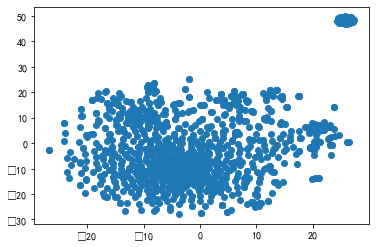

In [59]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

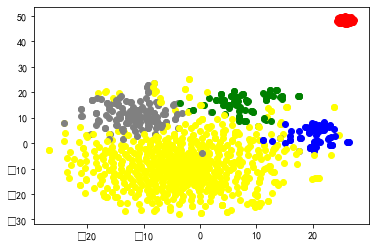

In [61]:
color = ['red', 'blue', 'green', 'gray', 'yellow']

for i, label in enumerate(kmeans.labels_):                #实际的聚类点分类图 （之所以要降2维embedded是因为可视化的问题）
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=color[label])

In [73]:
red_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 0]      #提取每一类的词的ID
blue_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 1]     

In [63]:
red_articles_id

[21,
 53,
 70,
 81,
 83,
 136,
 177,
 236,
 269,
 290,
 331,
 353,
 375,
 386,
 413,
 516,
 519,
 559,
 589,
 608,
 642,
 643,
 646,
 657,
 694,
 707,
 713,
 879,
 914,
 916,
 983,
 986,
 989,
 992]

In [64]:
for _id in red_articles_id[:10]:    #词ID转回去词，因为词要进行label变数字才可以处理的
    print(sample_sentences[_id])

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


In [67]:
for _id in blue_articles_id:
    print(''.join(sample_sentences[_id]))   #都是体育的

新华社照片杜塞尔多夫2017年6月4日n体育12乒乓球世乒赛波尔晋级八强n6月3日波尔在比赛中n当日在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛男单八分之一决赛中德国选手波尔以4比1战胜葡萄牙选手弗雷塔斯晋级八强n新华社记者罗欢欢摄
新华社照片外代2017年5月29日n外代二线高尔夫球PGA欧洲锦标赛瑞典选手诺伦夺冠n5月28日瑞典选手诺伦中夺冠后与美国选手乌伊莱因左握手致意n当日2017年PGA欧洲锦标赛在英格兰萨里郡的温特沃斯高尔夫俱乐部落幕瑞典选手诺伦最终夺冠n新华社路透AI
新华社照片外代2017年5月24日n外代二线网球日内瓦公开赛锦织圭晋级n5月23日哈萨克斯坦选手库库什金在比赛中回球n当日在瑞士日内瓦网球公开赛男单次轮比赛中日本选手锦织圭2比0战胜哈萨克斯坦选手库库什金n新华社欧新n
新华社照片黄石湖北2017年5月14日n体育5乒乓球女乒热身赛刘诗雯胜张瑞n5月14日张瑞在比赛中回球n当日在湖北黄石举行的中国女子乒乓球队备战德国世乒赛热身赛中刘诗雯以4比1战胜队友张瑞n新华社记者肖艺九摄
新华社巴黎６月４日电记者苏斌法网第八比赛日成为女单大满贯得主的出局日在４日的比赛中包括卫冕冠军穆古拉扎在内几位曾在大满贯赛事中有过夺冠经历的选手先后出局今年法网将诞生一位新的大满贯得主n女双项目中中国选手郑赛赛与罗马尼亚选手贝古的跨协会组合晋级八强男单两位名将纳达尔和焦科维奇拒绝冷门完成横扫后挺进八强n面对主场作战的梅拉德诺维奇出战女单第四轮的穆古拉扎压力可想而知尽管四号种子在首盘１６告负的情况下以６３拿下第二盘但她在现场观众一边倒的支持声中还是以３６丢掉决胜盘止步１６强n对观众表现有所不满的穆古拉扎在退场时面对掌声做出了摇手指的动作赛后泪洒发布会现场的她还隐晦地对此发表了个人观点我觉得他们现场观众有时应当对比赛多一份尊重比赛中我们时常需要停下来主裁需不断示意观众安静我来参赛不是为了树敌n两夺大满贯单打桂冠的八号种子库兹涅佐娃与１１号种子沃兹尼亚奇上演焦点对决沃兹尼亚奇以６１４６和６２笑到最后赛后库兹涅佐娃认为对手的防守做得很好比赛中自己得到了一些机会可惜没能把握住n另外两位大满贯女单冠军也止住了前进脚步七届大满贯得主大威廉姆斯以７５２６和１６不敌３０号种子巴辛斯基２０１１年美网冠军澳大利亚好手斯托瑟也以６２２６和４６遭拉脱维亚选手奥斯塔片科逆转n因前一日雨水被